In [1]:
#must be very first statement
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device: /device:GPU:0


In [2]:
from keras.datasets import cifar10
cifar10.load_data()

Using TensorFlow backend.


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

### Parameters

In [3]:
import os
import datetime

import keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
                        

### PARAMS:
#[0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck']
my_labels = [0,1,3,6,8]
batch_size = 32
epochs = 35
data_augmentation = False #self generate additional training data
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

### Data Preperation

In [4]:
#prepare selected labels for one hot encoding:
all_label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
label_names = []
for label_index in my_labels:
    label_names.append(all_label_names[label_index])  

print("Defining new Labeling:")
print(dict(zip(range(len(my_labels)),label_names)))

#if my_labels = [5,6,8] then 5 returns 0, 6 returns 1, 8 returns 2, ...
def convert_label(label):
    return dict(zip(my_labels,range(len(my_labels))))[label]

def label_name(num):
    return label_names[num]

# The data, split between train and test sets:
(x_train_all, y_train_all), (x_test_all, y_test_all) = cifar10.load_data()
    
#temp lists
x_train = []
y_train_numerical = []

#filter training data for my_labels
for i in range(len(x_train_all)):
    if y_train_all[i] in my_labels:
        x_train.append(x_train_all[i])
        y_train_numerical.append(convert_label(y_train_all[i][0]))
    else:
        pass

x_train = np.array(x_train)
y_train_numerical = np.array(y_train_numerical)

print("Training Data:\n")
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'samples,', y_train_numerical.shape[0], 'labels')
print("\nClass  |  Counts:")
(unique, counts) = np.unique(y_train_numerical, return_counts=True)
for i, label in enumerate(unique):
    print(label_name(label),"\t", counts[i])


x_test = []
y_test_numerical = []

#filter test data
for i in range(len(x_test_all)):
    if y_test_all[i] in my_labels:
        x_test.append(x_test_all[i])
        y_test_numerical.append(convert_label(y_test_all[i][0]))
    else:
        pass

x_test = np.array(x_test)
y_test_numerical = np.array(y_test_numerical)

print("\n\nTesting Data:\n")
print('x_test shape:', x_test.shape)
print(x_test.shape[0], 'samples,', y_test_numerical.shape[0], 'labels')
print("\nClass  |  Counts:")
(unique, counts) = np.unique(y_test_numerical, return_counts=True)
for i, label in enumerate(unique):
    print(label_name(label),"\t", counts[i])

Defining new Labeling:
{0: 'airplane', 1: 'automobile', 2: 'cat', 3: 'frog', 4: 'ship'}
Training Data:

x_train shape: (25000, 32, 32, 3)
25000 samples, 25000 labels

Class  |  Counts:
airplane 	 5000
automobile 	 5000
cat 	 5000
frog 	 5000
ship 	 5000


Testing Data:

x_test shape: (5000, 32, 32, 3)
5000 samples, 5000 labels

Class  |  Counts:
airplane 	 1000
automobile 	 1000
cat 	 1000
frog 	 1000
ship 	 1000


airplane


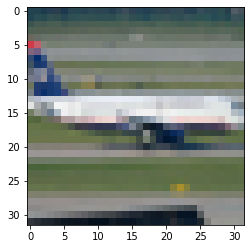

In [5]:
import matplotlib.pyplot as plt
testindex = 1999
img = x_test[testindex]
plt.imshow(img)
print(label_name(y_test_numerical[testindex]))

In [6]:
# labels to one hot vectors (for classification softmax loss)
y_train = keras.utils.to_categorical(y_train_numerical, len(my_labels))
y_test = keras.utils.to_categorical(y_test_numerical, len(my_labels))
y_test[15]

array([1., 0., 0., 0., 0.], dtype=float32)

In [7]:
#values between 0 and 1 instead of 0 and 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape)

(25000, 32, 32, 3)


In [8]:
epochs = 25

from tensorflow.keras.utils import plot_model
p = "C:/Users/Admin/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz"
os.environ["PATH"] += os.pathsep + p

## after grid:
filtergrößen = [3,6]
anzahl_filters = [32,128] # multiplied by 2 per preceding layer
conv_layerss = [1,3] #package of 2 convs 1 pool each

neural_unitss = [128,2048] # divided by 2 per preceding layer
neural_layerss = [1,3] # before softmax layer
activation_functionss = ["relu"]
dropouts = [0.5]

model_num = "MODEL"

for filtergröße in filtergrößen:
    for anzahl_filter in anzahl_filters:
        for conv_layers in conv_layerss:
            for neural_layers in neural_layerss:
                for neural_units in neural_unitss:
                    for activation_function in activation_functionss:     
                        for dropout in dropouts:
  
                            logdir = os.path.join("logs","cifar10","{}_filtersize-{}_filters-{}_ccp_nlayers-{}_nunits{}_nlayers-{}_dropout-{}_act{}".format(model_num, filtergröße, anzahl_filter,conv_layers, neural_units,neural_layers, dropout, activation_function))
                            if os.path.exists(os.path.join(logdir,"validation")):
                                print("Already done!",logdir)
                                continue
        
                            model = Sequential()

                            for i, conv_layer in enumerate(range(conv_layers)):
                                model.add(Conv2D(anzahl_filter*(i+1), (filtergröße, filtergröße), padding='same',
                                                 input_shape=x_train.shape[1:]))
                                model.add(Activation('relu'))
                                model.add(Conv2D(anzahl_filter*(i+1), (filtergröße, filtergröße), padding='same',
                                                 input_shape=x_train.shape[1:]))
                                model.add(Activation('relu'))
                                model.add(MaxPooling2D(pool_size=(2, 2)))
                                model.add(Dropout(dropout))

                            #previous multidim. values => single vector 512
                            #ohne flatten würde jeder filter einzeln interpretiert, so wird menge an filterergebnissen zusammengeführt
                            model.add(Flatten())
                            
                            for i, neural_layer in enumerate(range(neural_layers)):
                                model.add(Dense(neural_units/(i+1)))
                                model.add(Activation('relu'))
                                model.add(Dropout(dropout))
                                
                            model.add(Dense(len(my_labels)))
                            model.add(Activation('softmax'))

                            # initiate RMSprop optimizer
                            opt = tf.keras.optimizers.Adam(learning_rate=0.0002, decay=1e-6)
                            #opt = tf.keras.optimizers.SGD(learning_rate=0.0002, decay=1e-6, momentum=0.9)
                            
                            # Let's train the model using RMSprop
                            model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

                            # open tb: tensorboard --logdir logs/
                            tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
                          
                            #plot_model(model, to_file=logdir+'.png', show_shapes=True, show_layer_names=True, rankdir="LR",expand_nested=False)
                            
                            model.fit(x_train, y_train,
                                      batch_size=batch_size,
                                      epochs=epochs,
                                      validation_data=(x_test, y_test),
                                      shuffle=True,
                                      callbacks=[tensorboard_callback])


Already done! logs\cifar10\MODEL_filtersize-3_filters-32_ccp_nlayers-1_nunits128_nlayers-1_dropout-0.5_actrelu
Already done! logs\cifar10\MODEL_filtersize-3_filters-32_ccp_nlayers-1_nunits2048_nlayers-1_dropout-0.5_actrelu
Already done! logs\cifar10\MODEL_filtersize-3_filters-32_ccp_nlayers-1_nunits128_nlayers-3_dropout-0.5_actrelu
Already done! logs\cifar10\MODEL_filtersize-3_filters-32_ccp_nlayers-1_nunits2048_nlayers-3_dropout-0.5_actrelu
Already done! logs\cifar10\MODEL_filtersize-3_filters-32_ccp_nlayers-3_nunits128_nlayers-1_dropout-0.5_actrelu
Already done! logs\cifar10\MODEL_filtersize-3_filters-32_ccp_nlayers-3_nunits2048_nlayers-1_dropout-0.5_actrelu
Already done! logs\cifar10\MODEL_filtersize-3_filters-32_ccp_nlayers-3_nunits128_nlayers-3_dropout-0.5_actrelu
Already done! logs\cifar10\MODEL_filtersize-3_filters-32_ccp_nlayers-3_nunits2048_nlayers-3_dropout-0.5_actrelu
Already done! logs\cifar10\MODEL_filtersize-3_filters-128_ccp_nlayers-1_nunits128_nlayers-1_dropout-0.5_actr

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_distributed_function_1095 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignAddVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:GPU:0
24992/25000 [============================>.] - ETA: 0s - loss: 0.8512 - accuracy: 0.6663Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_6702 in device /job:localhost/repl

25000/25000 [==============================] - 30s 1ms/sample - loss: 0.0358 - accuracy: 0.9882 - val_loss: 0.6858 - val_accuracy: 0.8630
Epoch 22/25
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.6754 - val_accuracy: 0.8520
Epoch 23/25
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.0349 - accuracy: 0.9880 - val_loss: 0.6790 - val_accuracy: 0.8616
Epoch 24/25
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.0317 - accuracy: 0.9894 - val_loss: 0.6131 - val_accuracy: 0.8702
Epoch 25/25
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.0317 - accuracy: 0.9897 - val_loss: 0.6739 - val_accuracy: 0.8646
Executing op CloseSummaryWriter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing

25000/25000 [==============================] - 16s 651us/sample - loss: 0.7686 - accuracy: 0.7280 - val_loss: 0.5978 - val_accuracy: 0.7964
Epoch 7/25
25000/25000 [==============================] - 16s 651us/sample - loss: 0.7205 - accuracy: 0.7472 - val_loss: 0.5962 - val_accuracy: 0.7930
Epoch 8/25
25000/25000 [==============================] - 16s 651us/sample - loss: 0.6739 - accuracy: 0.7673 - val_loss: 0.5450 - val_accuracy: 0.8140
Epoch 9/25
25000/25000 [==============================] - 16s 652us/sample - loss: 0.6369 - accuracy: 0.7804 - val_loss: 0.5375 - val_accuracy: 0.8138
Epoch 10/25
25000/25000 [==============================] - 16s 651us/sample - loss: 0.6115 - accuracy: 0.7942 - val_loss: 0.5237 - val_accuracy: 0.8212
Epoch 11/25
25000/25000 [==============================] - 16s 651us/sample - loss: 0.5773 - accuracy: 0.8070 - val_loss: 0.5364 - val_accuracy: 0.8144
Epoch 12/25
25000/25000 [==============================] - 16s 651us/sample - loss: 0.5444 - accuracy: 

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:

Epoch 19/25
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.0614 - accuracy: 0.9793 - val_loss: 0.6474 - val_accuracy: 0.8592
Epoch 20/25
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.0540 - accuracy: 0.9813 - val_loss: 0.6512 - val_accuracy: 0.8494
Epoch 21/25
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.0552 - accuracy: 0.9816 - val_loss: 0.7064 - val_accuracy: 0.8566
Epoch 22/25
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.0549 - accuracy: 0.9814 - val_loss: 0.6163 - val_accuracy: 0.8550
Epoch 23/25
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.0531 - accuracy: 0.9816 - val_loss: 0.6576 - val_accuracy: 0.8556
Epoch 24/25
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.0481 - accuracy: 0.9842 - val_loss: 0.6780 - val_accuracy: 0.8594
Epoch 25/25
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.0425 - accuracy:

Epoch 3/25
25000/25000 [==============================] - 52s 2ms/sample - loss: 0.6367 - accuracy: 0.7678 - val_loss: 0.5678 - val_accuracy: 0.7874
Epoch 4/25
25000/25000 [==============================] - 52s 2ms/sample - loss: 0.5148 - accuracy: 0.8118 - val_loss: 0.4450 - val_accuracy: 0.8426
Epoch 5/25
25000/25000 [==============================] - 52s 2ms/sample - loss: 0.4420 - accuracy: 0.8440 - val_loss: 0.4148 - val_accuracy: 0.8524
Epoch 6/25
25000/25000 [==============================] - 52s 2ms/sample - loss: 0.3823 - accuracy: 0.8622 - val_loss: 0.3901 - val_accuracy: 0.8622
Epoch 7/25
25000/25000 [==============================] - 52s 2ms/sample - loss: 0.3375 - accuracy: 0.8832 - val_loss: 0.3423 - val_accuracy: 0.8810
Epoch 8/25
25000/25000 [==============================] - 52s 2ms/sample - loss: 0.2942 - accuracy: 0.8966 - val_loss: 0.3449 - val_accuracy: 0.8764
Epoch 9/25
25000/25000 [==============================] - 52s 2ms/sample - loss: 0.2612 - accuracy: 0.9077

Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Train on 25000 samples, validate on 5000 samples
Epoch 1/25
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:l

25000/25000 [==============================] - 54s 2ms/sample - loss: 0.2007 - accuracy: 0.9264 - val_loss: 0.3623 - val_accuracy: 0.8828
Epoch 15/25
25000/25000 [==============================] - 54s 2ms/sample - loss: 0.1829 - accuracy: 0.9333 - val_loss: 0.3946 - val_accuracy: 0.8718
Epoch 16/25
25000/25000 [==============================] - 54s 2ms/sample - loss: 0.1670 - accuracy: 0.9386 - val_loss: 0.3816 - val_accuracy: 0.8890
Epoch 17/25
25000/25000 [==============================] - 54s 2ms/sample - loss: 0.1569 - accuracy: 0.9427 - val_loss: 0.3835 - val_accuracy: 0.8856
Epoch 18/25
25000/25000 [==============================] - 54s 2ms/sample - loss: 0.1449 - accuracy: 0.9446 - val_loss: 0.4278 - val_accuracy: 0.8758
Epoch 19/25
25000/25000 [==============================] - 54s 2ms/sample - loss: 0.1406 - accuracy: 0.9480 - val_loss: 0.5107 - val_accuracy: 0.8684
Epoch 20/25
25000/25000 [==============================] - 54s 2ms/sample - loss: 0.1292 - accuracy: 0.9521 - va

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_distributed_function_773931 in device /job:localhost/replica:0/task:0/device:GPU:0
24992/25000 [============================>.] - ETA: 0s - loss: 1.6101 - accuracy: 0.1958Exec

25000/25000 [==============================] - 52s 2ms/sample - loss: 0.4488 - accuracy: 0.8551 - val_loss: 0.4922 - val_accuracy: 0.8478
Epoch 24/25
25000/25000 [==============================] - 52s 2ms/sample - loss: 0.4188 - accuracy: 0.8655 - val_loss: 0.4957 - val_accuracy: 0.8550
Epoch 25/25
25000/25000 [==============================] - 52s 2ms/sample - loss: 0.4039 - accuracy: 0.8687 - val_loss: 0.4933 - val_accuracy: 0.8516
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/de

Epoch 7/25
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.4135 - accuracy: 0.8528 - val_loss: 0.4586 - val_accuracy: 0.8414
Epoch 8/25
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.3736 - accuracy: 0.8681 - val_loss: 0.3761 - val_accuracy: 0.8672
Epoch 9/25
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.3366 - accuracy: 0.8768 - val_loss: 0.3735 - val_accuracy: 0.8728
Epoch 10/25
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.3171 - accuracy: 0.8896 - val_loss: 0.3765 - val_accuracy: 0.8720
Epoch 11/25
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.2864 - accuracy: 0.8996 - val_loss: 0.3997 - val_accuracy: 0.8742
Epoch 12/25
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.2684 - accuracy: 0.9026 - val_loss: 0.3950 - val_accuracy: 0.8720
Epoch 13/25
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.2439 - accuracy: 0.

In [9]:
import datetime
import tensorflow as tf
# open tb: tensorboard --logdir logs/
logdir = os.path.join(os.getcwd(), 'logs\\'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[tensorboard_callback])

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Prefet

Epoch 22/25
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.0750 - accuracy: 0.9765 - val_loss: 0.6455 - val_accuracy: 0.8916
Epoch 23/25
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.0816 - accuracy: 0.9758 - val_loss: 0.4956 - val_accuracy: 0.8886
Epoch 24/25
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.0712 - accuracy: 0.9762 - val_loss: 0.6276 - val_accuracy: 0.8916
Epoch 25/25
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.0761 - accuracy: 0.9755 - val_loss: 0.5096 - val_accuracy: 0.8906


In [ ]:
testindex = 56
img = x_test[testindex]
print("Correct label =",label_name(y_test_numerical[testindex]))
plt.imshow(img)
img = img.reshape((1,) + img.shape)
print("Prediction:",model.predict(img))

In [ ]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])